# Tên môn học: Thực Hành Học Máy
# Mã Học Phần: 010110104201
# Lớp Học Phần: 11DHTH10
# Giảng viên hướng dẫn: Trần Đình Toàn
# Nhóm: 1

- Tạo thuật toán MLP 4 layers:
- Đọc, lọc dữ liệu, làm sạch dữ liệu và tạo tập huấn luyện, tập kiểm tra và tập validation
- Xây dựng CSDL (SQL Server) lưu trữ hồ sơ bệnh nhân bị đột quỵ
- Xây dựng ứng dụng chẩn đoán bệnh kết nối CSDL (SQL Server) và mô hình đã tạo ở trên

In [ ]:
# Đây là tất cả thư viện phục vụ cho mô hình train
import tensorflow as tf # Thư viện TensorFlow để xây dựng và huấn luyện mô hình máy học sâu.
import numpy as np # Thư viện NumPy để làm việc với mảng và ma trận.
from tensorflow.keras import layers # Tạo các lớp mạng nơ-ron trong mô hình.
import pandas as pd # Thư viện Pandas để đọc và làm việc với dữ liệu dạng bảng.
from sklearn.model_selection import train_test_split # Hàm train_test_split từ sklearn.model_selection để chia dữ liệu thành tập huấn luyện và tập kiểm tra.
from sklearn.preprocessing import MinMaxScaler # Để chuẩn hóa dữ liệu về khoảng [0, 1].
from sklearn.preprocessing import OneHotEncoder, LabelEncoder # Để mã hoá dữ liệu phân loại.
from tensorflow.keras.models import load_model # Để tải mô hình đã được lưu trữ.

input_dim = 10  # Số lượng biến đầu vào sau khi mã hoá
# Khởi tạo model có 4 lớp
# model được khởi tạo là một mô hình tuần tự (Sequential) trong TensorFlow.
# layers.Dense đại diện cho một lớp mạng nơ-ron hoàn toàn kết nối.
model = tf.keras.Sequential([
    # Lớp đầu tiên có 64 nơ-ron, hàm kích hoạt relu và số lượng đầu vào là input_dim là 10.
    layers.Dense(64, activation='relu', input_dim=input_dim),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    # Lớp cuối cùng có 1 nơ-ron và hàm kích hoạt sigmoid, để dự đoán xác suất của lớp dương (1).
    layers.Dense(1, activation='sigmoid')
])

# Thuật toán tối ưu Adam để tối thiểu hóa hàm mất mát.
# Hàm mất mát dùng cho bài toán phân loại nhị phân.
# Xác định các chỉ số đánh giá mô hình, trong trường hợp này là độ chính xác.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# data được đọc từ tệp CSV chứa dữ liệu.
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# data_cleaned là bản sao của data sau khi loại bỏ các dòng chứa giá trị bị thiếu bằng cách sử dụng dropna().
data_cleaned = data.dropna()  
# Cột 'id' cũng được loại bỏ bằng cách sử dụng drop() với tham số axis=1 để chỉ định loại bỏ theo cột.
data_cleaned = data_cleaned.drop(['id'], axis=1)   

# label_encoder được khởi tạo từ LabelEncoder để mã hoá các biến phân loại thành các giá trị số.
# Các cột 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status' trong data_cleaned được mã hoá sử dụng label_encoder.fit_transform().
label_encoder = LabelEncoder()
data_cleaned['gender'] = label_encoder.fit_transform(data_cleaned['gender'])
data_cleaned['ever_married'] = label_encoder.fit_transform(data_cleaned['ever_married'])
data_cleaned['work_type'] = label_encoder.fit_transform(data_cleaned['work_type'])
data_cleaned['Residence_type'] = label_encoder.fit_transform(data_cleaned['Residence_type'])
data_cleaned['smoking_status'] = label_encoder.fit_transform(data_cleaned['smoking_status'])


# X chứa các đặc trưng (biến đầu vào) của dữ liệu, được lấy từ data_cleaned bằng cách bỏ cột 'stroke' sử dụng drop() và chuyển đổi thành mảng NumPy sử dụng values.
# y chứa nhãn (biến mục tiêu) của dữ liệu, là cột 'stroke' trong data_cleaned, cũng được chuyển đổi thành mảng NumPy.
X = data_cleaned.drop(['stroke'], axis=1).values
y = data_cleaned['stroke'].values

# Dữ liệu được chia thành tập huấn luyện và tập kiểm tra bằng train_test_split().
# test_size=0.2 chỉ định tỷ lệ mẫu trong tập kiểm tra là 20%.
# random_state=42 được sử dụng để đảm bảo kết quả chia dữ liệu như nhau mỗi khi chạy.
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model.fit() được sử dụng để huấn luyện mô hình trên dữ liệu huấn luyện.
# X_train_full và y_train_full là dữ liệu huấn luyện.
# epochs=100 chỉ định số lượt huấn luyện trên toàn bộ tập dữ liệu.
# batch_size=32 chỉ định số lượng mẫu được sử dụng trong mỗi lượt huấn luyện.
# validation_data=(X_test, y_test) xác định tập dữ liệu kiểm tra để đánh giá mô hình trong quá trình huấn luyện.
history = model.fit(X_train_full, y_train_full, epochs=100, batch_size=32, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# model.save() được sử dụng để lưu trữ mô hình vào tệp có tên "my_model.h5".
model.save("my_model.h5")
# load_model() được sử dụng để tải mô hình từ tệp "my_model.h5" và lưu trữ trong biến loaded_model.
loaded_model = load_model("my_model.h5")

# Tổng Quan: Xây dựng và huấn luyện một mô hình mạng nơ-ron sử dụng TensorFlow trên dữ liệu từ tệp CSV.
# Các biến đầu vào được mã hoá và mô hình được huấn luyện để dự đoán trạng thái "stroke" dựa trên các đặc trưng.
# Kết quả huấn luyện và đánh giá mô hình được ghi lại và mô hình cũng được lưu trữ để sử dụng sau này.

[1 1 1 ... 0 0 0]
Epoch 1/100
73/73 [==============================] - 3s 7ms/step - loss: 0.3452 - accuracy: 0.9026 - val_loss: 0.3470 - val_accuracy: 0.8847
Epoch 2/100
73/73 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.9095 - val_loss: 0.2586 - val_accuracy: 0.9174
Epoch 3/100
73/73 [==============================] - 0s 5ms/step - loss: 0.3145 - accuracy: 0.9034 - val_loss: 0.2503 - val_accuracy: 0.9157
Epoch 4/100
73/73 [==============================] - 0s 5ms/step - loss: 0.2733 - accuracy: 0.9082 - val_loss: 0.2655 - val_accuracy: 0.9174
Epoch 5/100
73/73 [==============================] - 0s 5ms/step - loss: 0.2678 - accuracy: 0.9138 - val_loss: 0.2680 - val_accuracy: 0.9122
Epoch 6/100
73/73 [==============================] - 0s 5ms/step - loss: 0.2797 - accuracy: 0.9043 - val_loss: 0.2475 - val_accuracy: 0.9157
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 0.2700 - accuracy: 0.9121 - val_loss: 0.2474 - val_accuracy: 0.

1. Tính giá trị trung bình của dữ liệu đầu vào và dữ liệu đích đến 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
# Read data from CSV file
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# Clean the data
data_cleaned = data.dropna()  # Remove rows with missing values
data_cleaned = data_cleaned.drop(['id'], axis=1)  # Drop unnecessary column 'id'

# Encode 'gender' and 'ever_married' variables using LabelEncoder
label_encoder = LabelEncoder()
data_cleaned['gender'] = label_encoder.fit_transform(data_cleaned['gender'])
data_cleaned['ever_married'] = label_encoder.fit_transform(data_cleaned['ever_married'])
data_cleaned['work_type'] = label_encoder.fit_transform(data_cleaned['work_type'])
data_cleaned['Residence_type'] = label_encoder.fit_transform(data_cleaned['Residence_type'])
data_cleaned['smoking_status'] = label_encoder.fit_transform(data_cleaned['smoking_status'])


# Split the data into features and target
X = data_cleaned.drop(['stroke'], axis=1).values
y = data_cleaned['stroke'].values

# Tính giá trị trung bình của dữ liệu
mean_value = np.mean(X)
print("Giá trị trung bình của dữ liệu đầu vào (X):", mean_value)
mean_value = np.mean(y)
print("Giá trị trung bình của biến đích y:", mean_value)

Giá trị trung bình của dữ liệu đầu vào (X): 18.611156497759396
Giá trị trung bình của biến đích y: 0.08479834539813857


2. Tổng số bệnh nhân dựa trên giới tính

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# Tính tổng số bệnh nhân dựa trên giới tính
patient_count_by_gender = data['gender'].value_counts()

# In kết quả
print(patient_count_by_gender)

Female    1725
Male      1274
Name: gender, dtype: int64


3. Tổng số bệnh nhân có bệnh hay không bệnh

In [ ]:
import pandas as pd

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# Tính tổng số bệnh nhân dựa trên giới tính
patient_count_by_stroke = data['stroke'].value_counts()

# In kết quả
print(patient_count_by_stroke)

0    2750
1     249
Name: stroke, dtype: int64


4. Trực quan về có bệnh hay không có bệnh

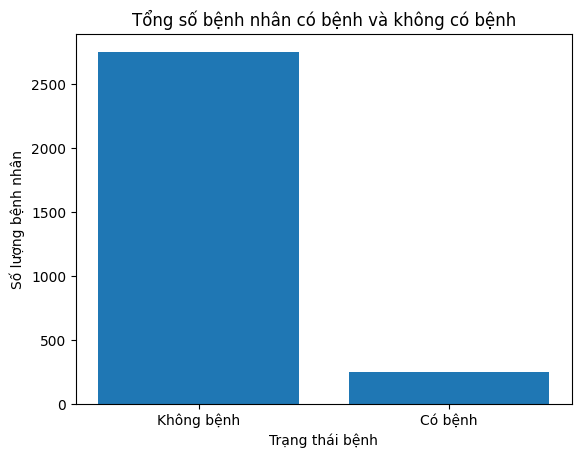

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# Tính tổng số bệnh nhân dựa trên giới tính
patient_count_by_stroke = data['stroke'].value_counts()

# Trực quan hóa số lượng bệnh nhân
plt.bar(patient_count_by_stroke.index, patient_count_by_stroke.values)
plt.xlabel('Trạng thái bệnh')
plt.ylabel('Số lượng bệnh nhân')
plt.xticks([0, 1], ['Không bệnh', 'Có bệnh'])
plt.title('Tổng số bệnh nhân có bệnh và không có bệnh')
plt.show()

5. Vẽ đồ thị phân phối trực quan theo hình tròn

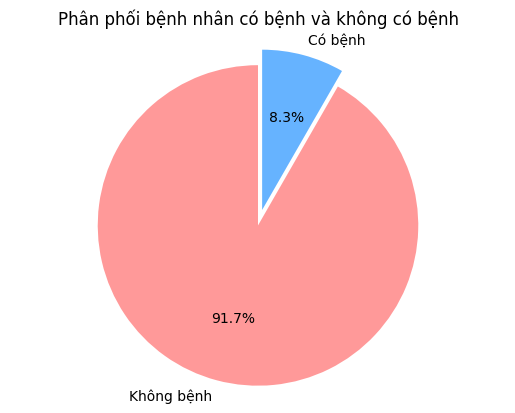

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# Tính tổng số bệnh nhân dựa trên giới tính
patient_count_by_stroke = data['stroke'].value_counts()

# Trực quan hóa tỷ lệ phần trăm bằng biểu đồ pie
labels = ['Không bệnh', 'Có bệnh']
sizes = patient_count_by_stroke.values
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Tách biệt một phần để nhấn mạnh

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Đảm bảo biểu đồ hình tròn
plt.title('Phân phối bệnh nhân có bệnh và không có bệnh')
plt.show()

6. Kiểm tra về các dữ liệu trên

In [ ]:
import pandas as pd

# Đường dẫn đến tệp CSV
file_path = "/content/drive/MyDrive/healthcare-dataset-stroke-data.csv"

# Đọc tệp CSV
data = pd.read_csv(file_path)

# Xem thông tin tổng quan về dữ liệu
print("Thông tin tổng quan về dữ liệu:")
print(data.info())

# Xem 5 dòng dữ liệu đầu tiên
print("\nDữ liệu đầu tiên:")
print(data.head())

# Thống kê các thuộc tính số
print("\nThống kê các thuộc tính số:")
print(data.describe())

# Thống kê các thuộc tính chuỗi
print("\nThống kê các thuộc tính chuỗi:")
print(data.describe(include=["object"]))

Thông tin tổng quan về dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2999 non-null   int64  
 1   gender             2999 non-null   object 
 2   age                2999 non-null   float64
 3   hypertension       2999 non-null   int64  
 4   heart_disease      2999 non-null   int64  
 5   ever_married       2999 non-null   object 
 6   work_type          2999 non-null   object 
 7   Residence_type     2999 non-null   object 
 8   avg_glucose_level  2999 non-null   float64
 9   bmi                2901 non-null   float64
 10  smoking_status     2999 non-null   object 
 11  stroke             2999 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 281.3+ KB
None

Dữ liệu đầu tiên:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0           

7. Kiểm tra giá trị thiếu (missing values)

In [ ]:
import pandas as pd

# Đường dẫn đến tệp CSV
file_path = "/content/drive/MyDrive/healthcare-dataset-stroke-data.csv"

# Đọc tệp CSV
data = pd.read_csv(file_path)

# Kiểm tra giá trị null
print("Giá trị thiếu(null):")
print(data.isnull().sum())

Giá trị thiếu(null):
id                    0
gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  98
smoking_status        0
stroke                0
dtype: int64


8. trực quan hoá đồ thị dạng mật độ

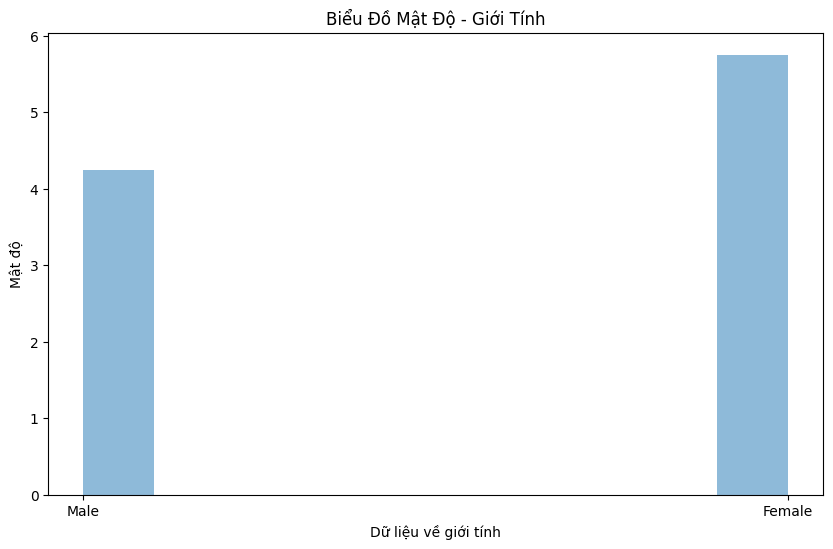

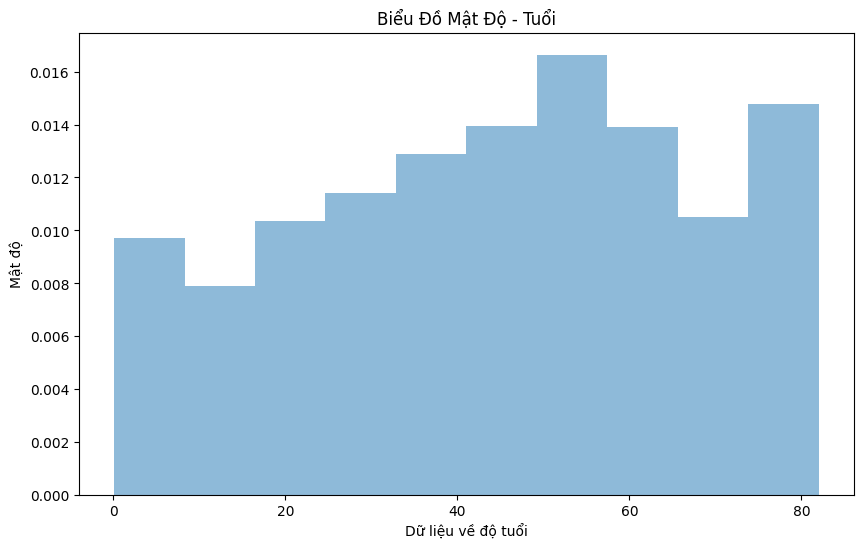

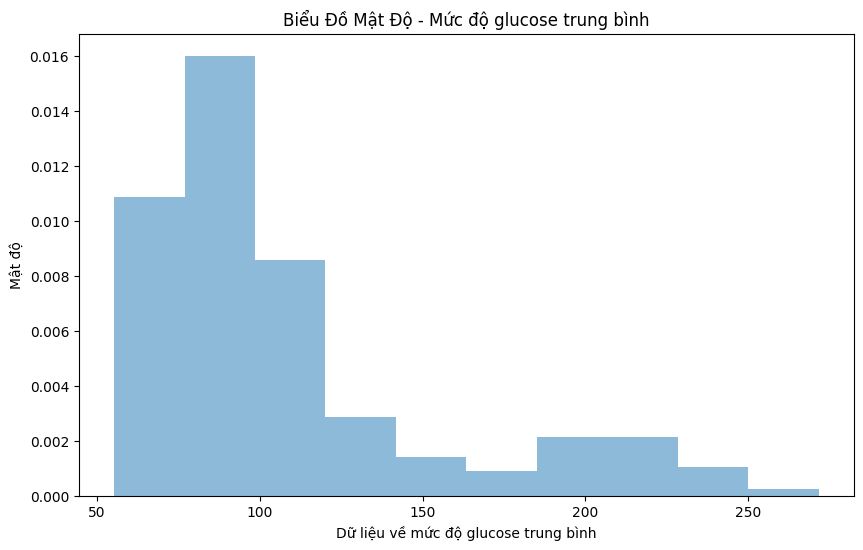

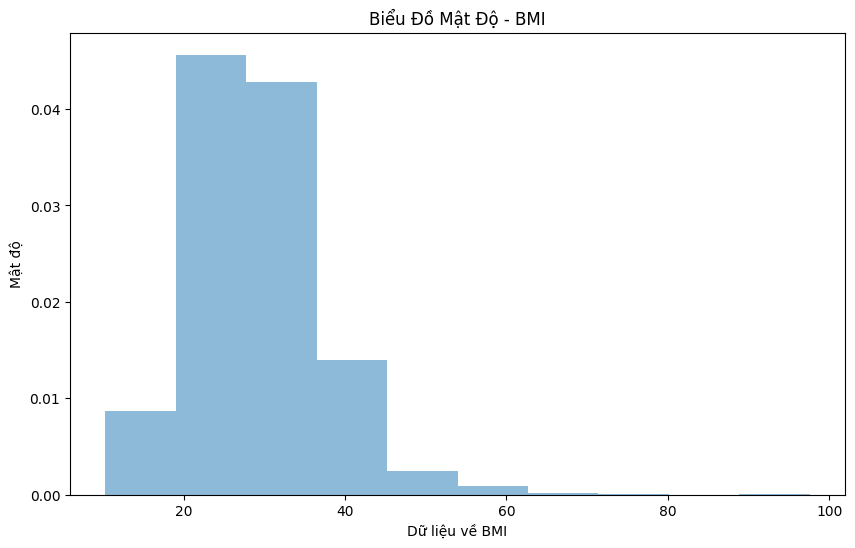

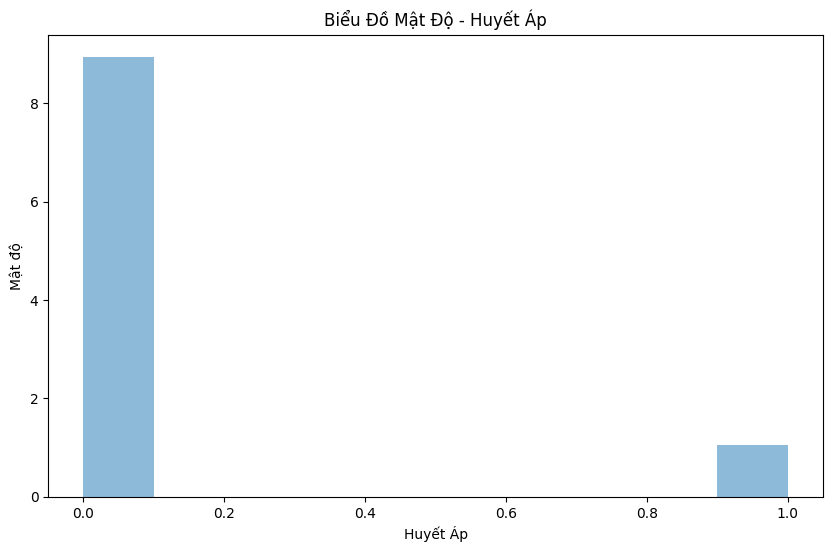

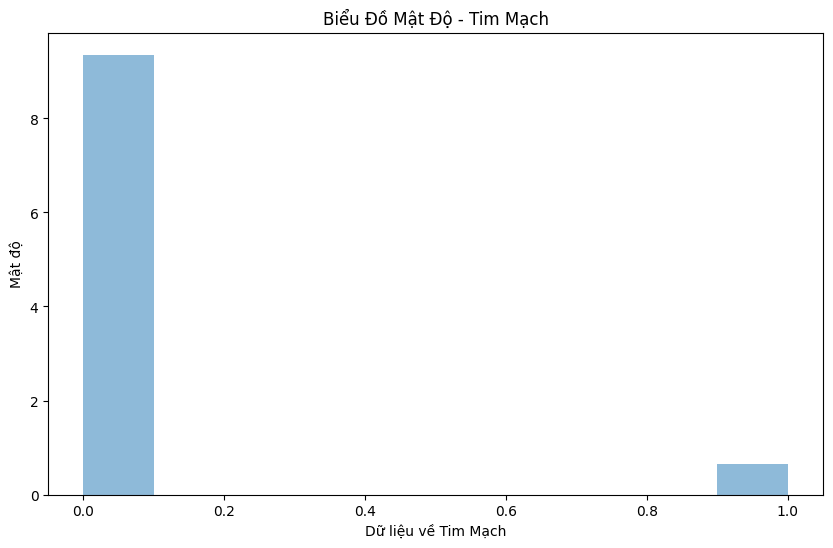

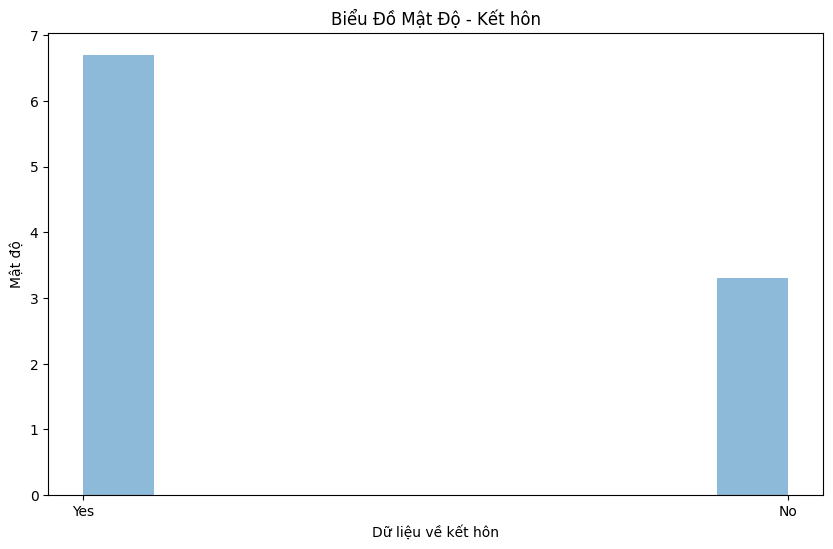

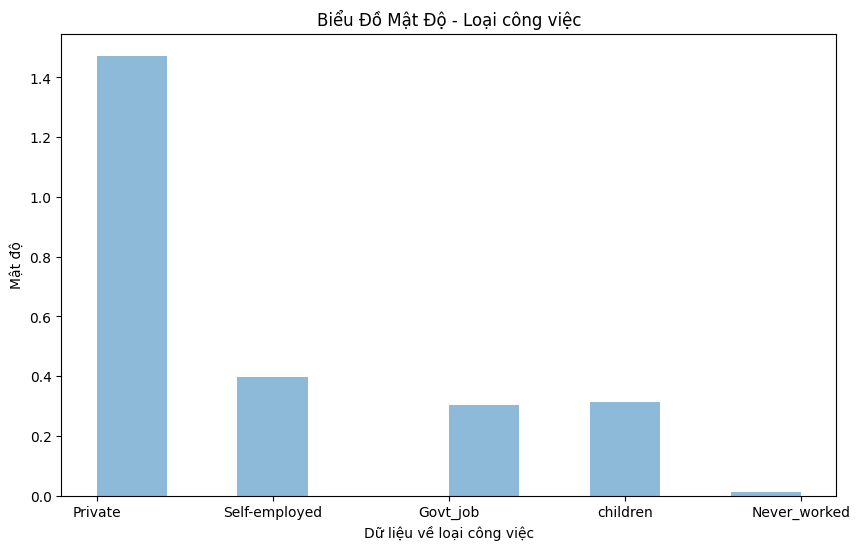

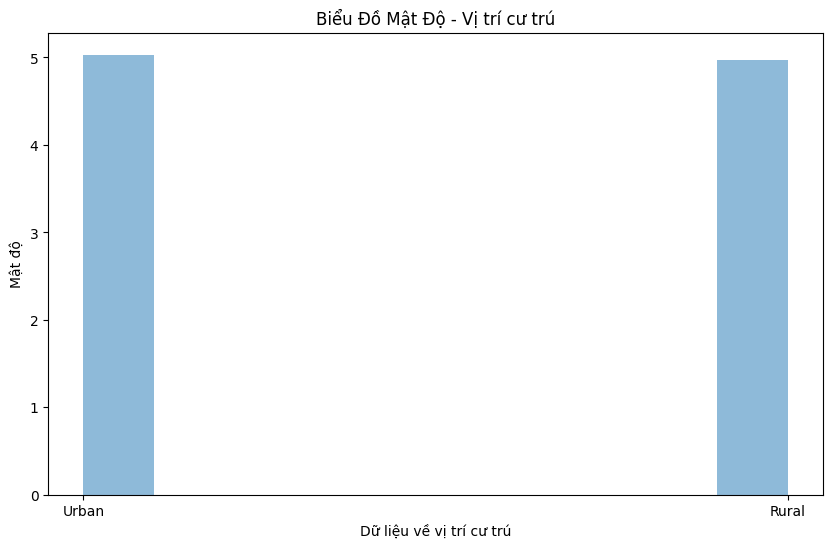

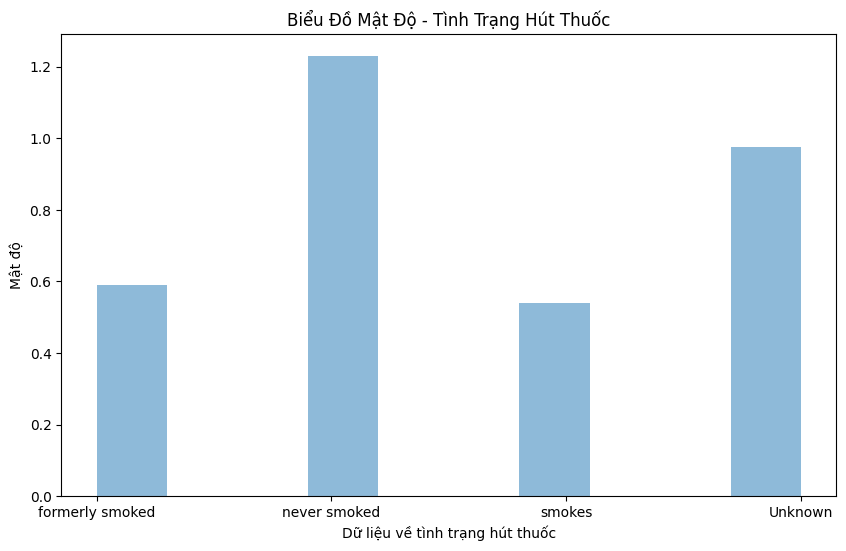

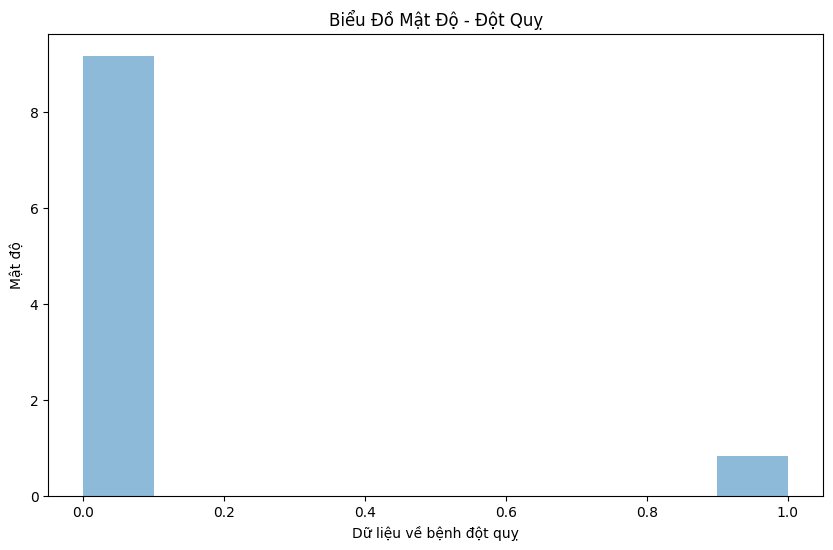

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Đường dẫn đến tệp CSV
file_path = "/content/drive/MyDrive/healthcare-dataset-stroke-data.csv"

# Đọc tệp CSV
data = pd.read_csv(file_path)

# Vẽ đồ thị mật độ cho cột "gender"
plt.figure(figsize=(10, 6))
plt.hist(data['gender'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về giới tính')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Giới Tính')
plt.show()

# Vẽ đồ thị mật độ cho cột "age"
plt.figure(figsize=(10, 6))
plt.hist(data['age'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về độ tuổi')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Tuổi')
plt.show()

# Vẽ đồ thị mật độ cho cột "avg_glucose_level"
plt.figure(figsize=(10, 6))
plt.hist(data['avg_glucose_level'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về mức độ glucose trung bình')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Mức độ glucose trung bình')
plt.show()

# Vẽ đồ thị mật độ cho cột "bmi"
plt.figure(figsize=(10, 6))
plt.hist(data['bmi'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về BMI')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - BMI')
plt.show()

# Vẽ đồ thị mật độ cho cột "hypertension"
plt.figure(figsize=(10, 6))
plt.hist(data['hypertension'], density=True, bins=10, alpha=0.5)
plt.xlabel('Huyết Áp')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Huyết Áp')
plt.show()

# Vẽ đồ thị mật độ cho cột "heart_disease"
plt.figure(figsize=(10, 6))
plt.hist(data['heart_disease'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về Tim Mạch')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Tim Mạch')
plt.show()

# Vẽ đồ thị mật độ cho cột "ever_married"
plt.figure(figsize=(10, 6))
plt.hist(data['ever_married'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về kết hôn')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Kết hôn')
plt.show()

# Vẽ đồ thị mật độ cho cột "work_type"
plt.figure(figsize=(10, 6))
plt.hist(data['work_type'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về loại công việc')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Loại công việc')
plt.show()

# Vẽ đồ thị mật độ cho cột "Residence_type"
plt.figure(figsize=(10, 6))
plt.hist(data['Residence_type'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về vị trí cư trú')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Vị trí cư trú')
plt.show()

# Vẽ đồ thị mật độ cho cột "smoking_status"
plt.figure(figsize=(10, 6))
plt.hist(data['smoking_status'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về tình trạng hút thuốc')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Tình Trạng Hút Thuốc')
plt.show()

# Vẽ đồ thị mật độ cho cột "stroke"
plt.figure(figsize=(10, 6))
plt.hist(data['stroke'], density=True, bins=10, alpha=0.5)
plt.xlabel('Dữ liệu về bệnh đột quỵ')
plt.ylabel('Mật độ')
plt.title('Biểu Đồ Mật Độ - Đột Quỵ')
plt.show()

9. Kiểm tra phương sai của dữ liệu

In [ ]:
import pandas as pd

# Đọc dữ liệu từ tệp CSV vào DataFrame
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

# Chọn các thuộc tính số
numeric_columns = data.select_dtypes(include=['number', 'string'])

# Tính phương sai của từng thuộc tính số
variance = numeric_columns.var()

# Hiển thị kết quả
print(variance)

id                   4.456950e+08
age                  5.152488e+02
hypertension         9.403401e-02
heart_disease        6.023333e-02
avg_glucose_level    2.171189e+03
bmi                  6.241913e+01
stroke               7.615948e-02
dtype: float64


10. Kiểm tra dữ liệu trước khi và sau khi loại bỏ

In [ ]:
# Kiểm tra dữ liệu trước khi loại bỏ
print("Dữ liệu trước khi loại bỏ:")
print(data.head())

# Loại bỏ các dòng có giá trị bị thiếu
data_cleaned = data.dropna()

# Kiểm tra dữ liệu sau khi loại bỏ
print("\nDữ liệu sau khi loại bỏ:")
print(data_cleaned.head())

Dữ liệu trước khi loại bỏ:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  33.3     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Dữ liệu sau khi loại bỏ:
   